In [ ]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!/bin/bash
# Download Dataset
!kaggle datasets download bhavikjikadara/dog-and-cat-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset
License(s): apache-2.0
 94% 729M/775M [00:04<00:00, 50.1MB/s]
100% 775M/775M [00:04<00:00, 198MB/s] 


In [ ]:
# Unzip the folder to access the data
! unzip /content/dog-and-cat-classification-dataset.zip
# /content/dog-and-cat-classification-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5499.jpg  
  inflating: PetImages/Dog/55.jpg    
  inflating: PetImages/Dog/550.jpg   
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import PIL
from sklearn.model_selection import train_test_split
# from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

import warnings
warnings.filterwarnings('ignore')

import os


## Create DataFrame for Input and output¶


In [ ]:
root_path = "/content/PetImages"
input_path = []
label = []

for class_name in os.listdir(root_path):
    # Add a slash (/) when joining the root path and class name
    for path in os.listdir(os.path.join(root_path, class_name)):
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join(root_path, class_name, path))

In [ ]:
# print(input_path[:10], label[:10])
for i in range(0,50):
    print(input_path[i], label[i])


/content/PetImages/Cat/1581.jpg 0
/content/PetImages/Cat/4670.jpg 0
/content/PetImages/Cat/8279.jpg 0
/content/PetImages/Cat/11877.jpg 0
/content/PetImages/Cat/3335.jpg 0
/content/PetImages/Cat/561.jpg 0
/content/PetImages/Cat/6585.jpg 0
/content/PetImages/Cat/2173.jpg 0
/content/PetImages/Cat/704.jpg 0
/content/PetImages/Cat/3245.jpg 0
/content/PetImages/Cat/7221.jpg 0
/content/PetImages/Cat/10232.jpg 0
/content/PetImages/Cat/8009.jpg 0
/content/PetImages/Cat/9943.jpg 0
/content/PetImages/Cat/2269.jpg 0
/content/PetImages/Cat/6934.jpg 0
/content/PetImages/Cat/11327.jpg 0
/content/PetImages/Cat/9523.jpg 0
/content/PetImages/Cat/1785.jpg 0
/content/PetImages/Cat/7001.jpg 0
/content/PetImages/Cat/6716.jpg 0
/content/PetImages/Cat/11116.jpg 0
/content/PetImages/Cat/11733.jpg 0
/content/PetImages/Cat/12084.jpg 0
/content/PetImages/Cat/2878.jpg 0
/content/PetImages/Cat/11774.jpg 0
/content/PetImages/Cat/8007.jpg 0
/content/PetImages/Cat/6604.jpg 0
/content/PetImages/Cat/9747.jpg 0
/content/

In [ ]:
# length of input_path and label¶

len(input_path), len(label)


(24998, 24998)

In [ ]:
df = pd.DataFrame({"Images_path": input_path,"Label": label})
df['Label'] = df['Label'].astype('str')
df.head(10)

,Images_path,Label
0,/content/PetImages/Cat/1581.jpg,0
1,/content/PetImages/Cat/4670.jpg,0
2,/content/PetImages/Cat/8279.jpg,0
3,/content/PetImages/Cat/11877.jpg,0
4,/content/PetImages/Cat/3335.jpg,0
5,/content/PetImages/Cat/561.jpg,0
6,/content/PetImages/Cat/6585.jpg,0
7,/content/PetImages/Cat/2173.jpg,0
8,/content/PetImages/Cat/704.jpg,0
9,/content/PetImages/Cat/3245.jpg,0


In [ ]:
# Check only .jpg file there into the dataset¶

for i in df['Images_path']:
    if '.jpg' not in i:
        print(i)

In [ ]:
l = []
for image in df['Images_path']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)

In [ ]:
l[:5]


[]

## Spliting the dataset into training and testing¶


In [ ]:
train, test = train_test_split(df, test_size = 0.25, random_state=42)
train.shape, test.shape

((18748, 2), (6250, 2))

## Create DataGenerator for the images¶


In [ ]:
# training data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=45,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation generator
val_generator = ImageDataGenerator(
    rescale=1.0/255
)

In [ ]:
# train and validation iterator
train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col='Images_path',
    y_col='Label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col='Images_path',
    y_col='Label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

Found 18748 validated image filenames belonging to 2 classes.
Found 6250 validated image filenames belonging to 2 classes.


## Modeling - CNN


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 540,929 (2.06 MB)

 Trainable params: 540,929 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_iterator,
    epochs=10,
    validation_data=val_iterator
)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 137s 3s/step - accuracy: 0.5267 - loss: 0.6906 - val_accuracy: 0.5389 - val_loss: 0.7054
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step - accuracy: 0.6090 - loss: 0.6545 - val_accuracy: 0.6421 - val_loss: 0.6241
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 102s 3s/step - accuracy: 0.6686 - loss: 0.6068 - val_accuracy: 0.7224 - val_loss: 0.5421
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step - accuracy: 0.7092 - loss: 0.5586 - val_accuracy: 0.7486 - val_loss: 0.5045
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.7416 - loss: 0.5159 - val_accuracy: 0.7786 - val_loss: 0.4658
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step - accuracy: 0.7661 - loss: 0.4856 - val_accuracy: 0.7888 - val_loss: 0.4460
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step - accuracy: 0.7843 - loss: 0.4547 - val_accuracy: 0.7995 - val_loss: 0.4417
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.7805 - loss: 0.4579 - val_accuracy: 0.8122 - va

## Visualization of Results

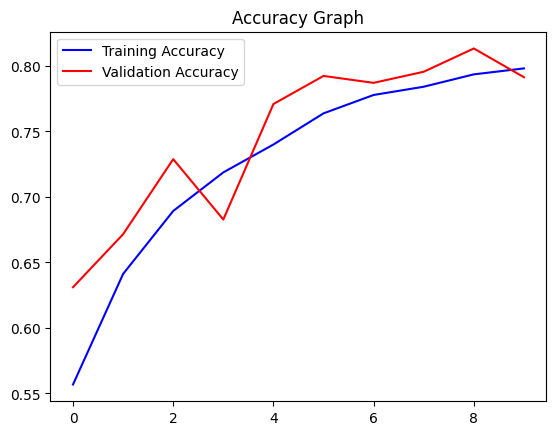

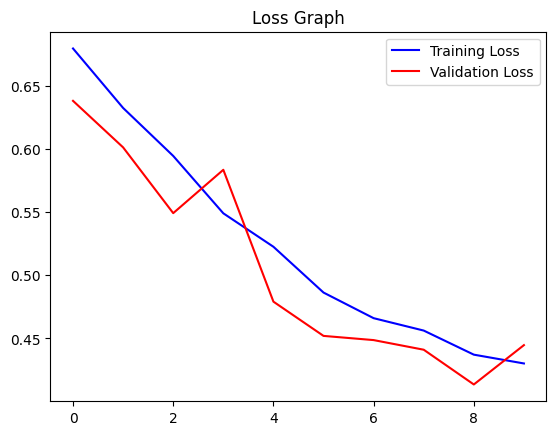

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()